In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the data
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')


In [4]:
# Fill missing values
for column in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train_data[column].fillna(train_data[column].mean(), inplace=True)


In [5]:
# Encoding categorical variables
le = LabelEncoder()
for column in ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']:
    train_data[column] = le.fit_transform(train_data[column])

In [6]:
# Scaling numerical variables
scaler = StandardScaler()
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train_data[column] = scaler.fit_transform(train_data[column].values.reshape(-1, 1))


In [7]:
# Splitting data into features (X) and target (y)
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

In [8]:
# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7843588269120184

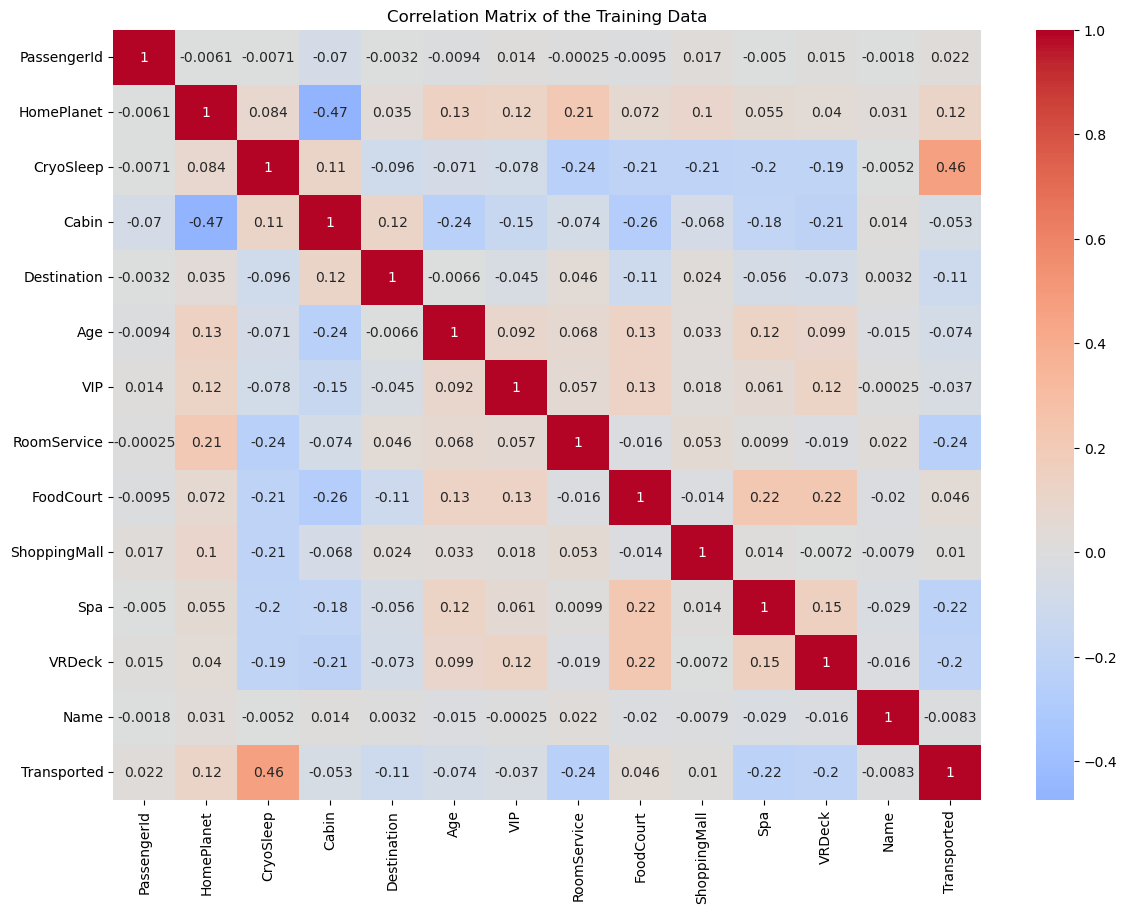

In [11]:
# Correlation matrix
corr = train_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of the Training Data')
plt.show()

In [12]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Calculate the accuracy of the model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
accuracy_xgb

0.7786083956296722

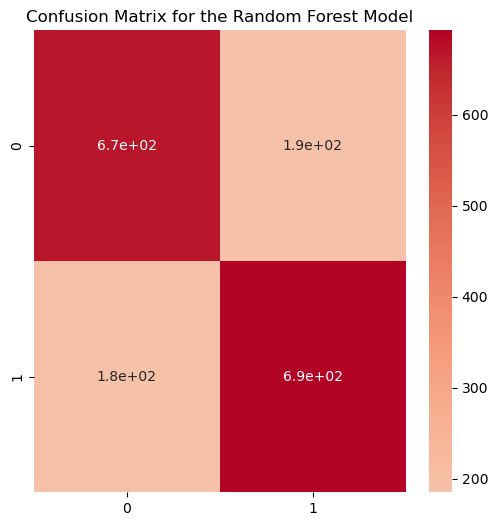

In [13]:
# Confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, cmap='coolwarm', center=0)
plt.title('Confusion Matrix for the Random Forest Model')
plt.show()

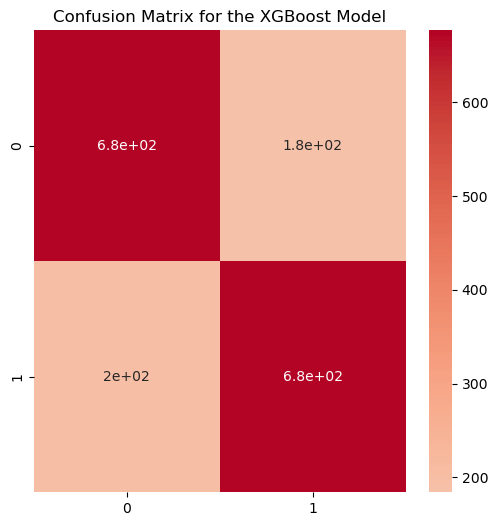

In [14]:
# Confusion matrix for the XGBoost model
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, cmap='coolwarm', center=0)
plt.title('Confusion Matrix for the XGBoost Model')
plt.show()

In [15]:
# Hyperparameter tuning for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   5.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   4.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   6.1s
[CV] END bootstrap=True, max_depth=None, min_sam

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [16]:
# Preprocess the test data
for column in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    test_data[column].fillna(test_data[column].mean(), inplace=True)

for column in ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']:
    test_data[column] = le.fit_transform(test_data[column])

for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    test_data[column] = scaler.transform(test_data[column].values.reshape(-1, 1))

# Make predictions on the test set
test_predictions = model.predict(test_data)


# Prepare the submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': test_predictions
})

# Convert 'PassengerId' back to string
submission['PassengerId'] = submission['PassengerId'].astype(str)

# Save the submission dataframe to a csv file
submission.to_csv('/kaggle/working/submission.csv', index=False)  



